<a href="https://colab.research.google.com/github/Social-merit/Machine-learning-Deep-learning/blob/main/DeepLearningAtoZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Artificial Neural Network




***Artificial Neural Networks (ANN)***
*   Additional Reading:

    Yann LeCun et al., 1998, [Efficient BackProp](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

    By Xavier Glorot et al., 2011 [Deep sparse rectifier neural networks](http://jmlr.org/proceedings/papers/v15/glorot11a/glorot11a.pdf)

    CrossValidated, 2015, [A list of cost functions used in neural networks, alongside applications](http://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications)

    Andrew Trask, 2015, [A Neural Network in 13 lines of Python (Part 2 – Gradient Descent)](https://iamtrask.github.io/2015/07/27/python-network-part2/)

    Michael Nielsen, 2015, [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap2.html)








In [2]:
!cp /content/drive/MyDrive/Program/Data/DeepLearning/ann.zip ./

In [3]:
!unzip ann.zip

Archive:  ann.zip
  inflating: Churn_Modelling.csv     


In [4]:
# Artificial Neural Network

# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

# Part 1 - Data Preprocessing

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Building the ANN

# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Part 4 - Making the predictions and evaluating the model

# Predicting the result of a single observation

"""
work out:
Use our ANN model to predict if the customer with the following informations will leave the bank: 
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $ 60000
Number of Products: 2
Does this customer have a credit card? Yes
Is this customer an Active Member: Yes
Estimated Salary: $ 50000
So, should we say goodbye to that customer?

Solution:
"""
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

"""
Therefore, our ANN model predicts that this customer stays in the bank!
Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.
Important note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.
"""

# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]
[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]
Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5319 - accuracy: 0.7844
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7960


0.8665

## Convolutional Neural Network

Additional Reading:

*   Additional Reading:

    Yann LeCun et al., 1998, [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

    Jianxin Wu, 2017, [Introduction to Convolutional Neural Networks](http://cs.nju.edu.cn/wujx/paper/CNN.pdf)

    C.-C. Jay Kuo, 2016, [Understanding Convolutional Neural Networks with A Mathematical Model](https://arxiv.org/pdf/1609.04112.pdf)

    Kaiming He et al., 2015, [Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/pdf/1502.01852.pdf)

    Dominik Scherer et al., 2010, [Evaluation of Pooling Operations in Convolutional Architectures for Object Recognition](http://ais.uni-bonn.de/papers/icann2010_maxpool.pdf)

    Adit Deshpande, 2016, [The 9 Deep Learning Papers You Need To Know About (Understanding CNNs Part 3)](https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html/)

    Rob DiPietro, 2016, [A Friendly Introduction to Cross-Entropy Loss](https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/)

    Peter Roelants, 2016, [How to implement a neural network Intermezzo 2](http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/)




In [3]:
!cp /content/drive/MyDrive/Program/Data/DeepLearning/cnn.zip ./

In [ ]:
!unzip cnn.zip

In [5]:

# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('cnn/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('cnn/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

# Part 4 - Making a single prediction

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('cnn/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 50s 161ms/step - loss: 0.6644 - accuracy: 0.5951 - val_loss: 0.6036 - val_accuracy: 0.6925
Epoch 2/25
250/250 [==============================] - 40s 160ms/step - loss: 0.5948 - accuracy: 0.6841 - val_loss: 0.5732 - val_accuracy: 0.6930
Epoch 3/25
250/250 [==============================] - 40s 159ms/step - loss: 0.5519 - accuracy: 0.7172 - val_loss: 0.5551 - val_accuracy: 0.7165
Epoch 4/25
250/250 [==============================] - 40s 161ms/step - loss: 0.5214 - accuracy: 0.7455 - val_loss: 0.5101 - val_accuracy: 0.7575
Epoch 5/25
250/250 [==============================] - 40s 162ms/step - loss: 0.4882 - accuracy: 0.7624 - val_loss: 0.5002 - val_accuracy: 0.7630
Epoch 6/25
250/250 [==============================] - 40s 162ms/step - loss: 0.4842 - accuracy: 0.7667 - val_loss: 0.4842 - val_accuracy: 0.7770
Epoch 7/25
250/250 [==========================

AttributeError: ignored

## Recurrent Neural Network

*   Additional Reading:

    Oscar Sharp & Benjamin, 2016, [Sunspring](https://arstechnica.com/the-multiverse/2016/06/an-ai-wrote-this-movie-and-its-strangely-moving/)

    Sepp (Josef) Hochreiter, 1991, [Untersuchungen zu dynamischen neuronalen Netzen](http://people.idsia.ch/~juergen/SeppHochreiter1991ThesisAdvisorSchmidhuber.pdf)

    Yoshua Bengio, 1994, [Learning Long-Term Dependencies with Gradient Descent is Difficult](http://www-dsi.ing.unifi.it/~paolo/ps/tnn-94-gradient.pdf)

    Razvan Pascanu, 2013, [On the difficulty of training recurrent neural networks](http://www.jmlr.org/proceedings/papers/v28/pascanu13.pdf)

    Sepp Hochreiter & Jurgen Schmidhuber, 1997, [Long Short-Term Memory](http://www.bioinf.jku.at/publications/older/2604.pdf) 

    Christopher Olah, 2015, [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

    Shi Yan, 2016, [Understanding LSTM and its diagrams](https://medium.com/@shiyan/understanding-lstm-and-its-diagrams-37e2f46f1714)

    Andrej Karpathy, 2015, [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

    Andrej Karpathy, 2015, [Visualizing and Understanding Recurrent Networks](https://arxiv.org/pdf/1506.02078.pdf)

    Klaus Greff, 2015, [LSTM: A Search Space Odyssey](https://arxiv.org/pdf/1503.04069.pdf)

    Xavier Glorot, 2011, [Deep sparse rectifier neural networks](http://jmlr.org/proceedings/papers/v15/glorot11a/glorot11a.pdf)
    



In [6]:
!cp /content/drive/MyDrive/Program/Data/DeepLearning/rnn.zip ./

In [7]:
!unzip rnn.zip

Archive:  rnn.zip
  inflating: Google_Stock_Price_Test.csv  
  inflating: Google_Stock_Price_Train.csv  


Epoch 1/100
38/38 [==============================] - 9s 16ms/step - loss: 0.0456
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0056
Epoch 12/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0046
Epoch 13/100
38/38 [=====

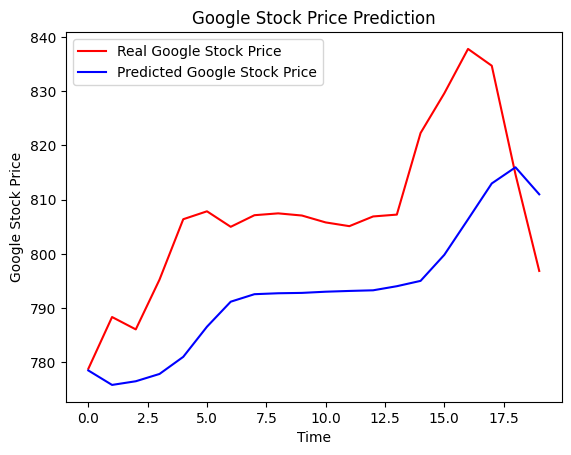

In [8]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Self Organizing Map


*   Additional Reading:

    Tuevo Kohonen, 1990, [The Self-Organizing Map](http://sci2s.ugr.es/keel/pdf/algorithm/articulo/1990-Kohonen-PIEEE.pdf)

    Mat Buckland, 2004?, [Kohonen's Self Organizing Feature Maps](http://www.ai-junkie.com/ann/som/som1.html)
    
    Nadieh Bremer, 2003, [SOM – Creating hexagonal heatmaps with D3.js](https://www.visualcinnamon.com/2013/07/self-organizing-maps-creating-hexagonal.html)












In [12]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=67425a73b16f4bd098300c03f60199136d72fcabc7c91c2397318404991db4f5
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [9]:
!cp /content/drive/MyDrive/Program/Data/DeepLearning/som.zip ./

In [10]:
!unzip som.zip

Archive:  som.zip
  inflating: Credit_Card_Applications.csv  


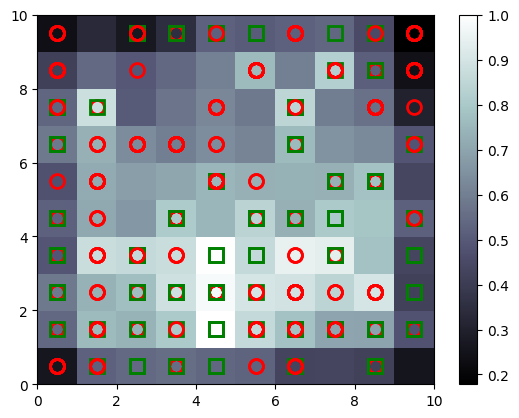

Fraud Customer IDs
15776156
15745804
15788224
15787229
15713160
15764922
15754578
15790113
15735330
15809909
15796413
15776921
15654859
15723827
15725028
15667460


In [13]:

##Install MiniSom Package
"""

!pip install MiniSom

"""### Importing the libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""## Importing the dataset"""

dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

"""## Feature Scaling"""

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

"""##Training the SOM"""

from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

"""##Visualizing the results"""

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

"""## Finding the frauds"""

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

"""##Printing the Fraunch Clients"""

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

## Boltzmann Machine



*   Additional Reading:

    Yann LeCun, 2006, [A Tutorial on Energy-Based Learning](http://yann.lecun.com/exdb/publis/pdf/lecun-06.pdf)

    Jaco Van Dormael, 2009, [Mr. Nobody](http://www.imdb.com/title/tt0485947/)

    Geoffrey Hinton, 2006, [A fast learning algorithm for deep belief nets](https://www.cs.toronto.edu/~hinton/absps/fastnc.pdf)

    Oliver Woodford, 2012?, [Notes on Contrastive Divergence](http://www.robots.ox.ac.uk/~ojw/files/NotesOnCD.pdf)

 Yoshua Bengio, 2006, [Greedy Layer-Wise Training of Deep Networks](http://www.iro.umontreal.ca/~lisa/pointeurs/BengioNips2006All.pdf)

    Geoffrey Hinton, 1995, [The wake-sleep algorithm for unsupervised neural networks](http://www.gatsby.ucl.ac.uk/~dayan/papers/hdfn95.pdf)

    Ruslan Salakhutdinov, 2009?, [Deep Boltzmann Machines](http://www.utstat.toronto.edu/~rsalakhu/papers/dbm.pdf)
    

In [14]:
!cp /content/drive/MyDrive/Program/Data/DeepLearning/BoltM.zip ./

In [ ]:
!unzip BoltM.zip

In [16]:
#Downloading the dataset

###ML-100K
"""

!wget "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
!unzip ml-100k.zip
!ls

"""###ML-1M"""

!wget "http://files.grouplens.org/datasets/movielens/ml-1m.zip"
!unzip ml-1m.zip
!ls

"""##Importing the libraries"""

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

"""## Importing the dataset"""

# We won't be using this dataset.
movies = pd.read_csv('ml-1m/movies.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')

"""## Preparing the training set and the test set"""

training_set = pd.read_csv('ml-100k/u1.base', delimiter = '\t')
training_set = np.array(training_set, dtype = 'int')
test_set = pd.read_csv('ml-100k/u1.test', delimiter = '\t')
test_set = np.array(test_set, dtype = 'int')

"""## Getting the number of users and movies"""

nb_users = int(max(max(training_set[:, 0], ), max(test_set[:, 0])))
nb_movies = int(max(max(training_set[:, 1], ), max(test_set[:, 1])))

"""## Converting the data into an array with users in lines and movies in columns"""

def convert(data):
  new_data = []
  for id_users in range(1, nb_users + 1):
    id_movies = data[:, 1] [data[:, 0] == id_users]
    id_ratings = data[:, 2] [data[:, 0] == id_users]
    ratings = np.zeros(nb_movies)
    ratings[id_movies - 1] = id_ratings
    new_data.append(list(ratings))
  return new_data
training_set = convert(training_set)
test_set = convert(test_set)

"""## Converting the data into Torch tensors"""

training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

"""## Converting the ratings into binary ratings 1 (Liked) or 0 (Not Liked)"""

training_set[training_set == 0] = -1
training_set[training_set == 1] = 0
training_set[training_set == 2] = 0
training_set[training_set >= 3] = 1
test_set[test_set == 0] = -1
test_set[test_set == 1] = 0
test_set[test_set == 2] = 0
test_set[test_set >= 3] = 1

"""## Creating the architecture of the Neural Network"""

class RBM():
  def __init__(self, nv, nh):
    self.W = torch.randn(nh, nv)
    self.a = torch.randn(1, nh)
    self.b = torch.randn(1, nv)
  def sample_h(self, x):
    wx = torch.mm(x, self.W.t())
    activation = wx + self.a.expand_as(wx)
    p_h_given_v = torch.sigmoid(activation)
    return p_h_given_v, torch.bernoulli(p_h_given_v)
  def sample_v(self, y):
    wy = torch.mm(y, self.W)
    activation = wy + self.b.expand_as(wy)
    p_v_given_h = torch.sigmoid(activation)
    return p_v_given_h, torch.bernoulli(p_v_given_h)
  def train(self, v0, vk, ph0, phk):
    self.W += (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
    self.b += torch.sum((v0 - vk), 0)
    self.a += torch.sum((ph0 - phk), 0)
nv = len(training_set[0])
nh = 100
batch_size = 100
rbm = RBM(nv, nh)

"""## Training the RBM"""

nb_epoch = 10
for epoch in range(1, nb_epoch + 1):
  train_loss = 0
  s = 0.
  for id_user in range(0, nb_users - batch_size, batch_size):
    vk = training_set[id_user : id_user + batch_size]
    v0 = training_set[id_user : id_user + batch_size]
    ph0,_ = rbm.sample_h(v0)
    for k in range(10):
      _,hk = rbm.sample_h(vk)
      _,vk = rbm.sample_v(hk)
      vk[v0<0] = v0[v0<0]
    phk,_ = rbm.sample_h(vk)
    rbm.train(v0, vk, ph0, phk)
    train_loss += torch.mean(torch.abs(v0[v0 >= 0] - vk[v0 >= 0]))
    s += 1.
  print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

"""## Testing the RBM"""

test_loss = 0
s = 0.
for id_user in range(nb_users):
    v = training_set[id_user:id_user+1]
    vt = test_set[id_user:id_user+1]
    if len(vt[vt>=0]) > 0:
        _,h = rbm.sample_h(v)
        _,v = rbm.sample_v(h)
        test_loss += torch.mean(torch.abs(vt[vt>=0] - v[vt>=0]))
        s += 1.
print('test loss: '+str(test_loss/s))

--2023-05-05 19:48:19--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  3.43MB/s    in 1.6s    

2023-05-05 19:48:22 (3.43 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Archive:  ml-1m.zip
replace ml-1m/movies.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-1m/movies.dat        
replace ml-1m/ratings.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         
BoltM.zip		      Google_Stock_Price_Test.csv   rnn.zip
cnn			      Google_Stock_Price_Train.csv  sample_data
cnn.zip			      ml-100k			    som.zip
Credit_Card_Applications.csv  ml-1m
drive	

## AutoEncoders

*   Additional Reading:

    Malte Skarupke, 2016, [Neural Networks Are Impressively Good At Compression](https://probablydance.com/2016/04/30/neural-networks-are-impressively-good-at-compression)

    Francois Chollet, 2016, [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

    Chris McCormick, 2014, Deep Learning Tutorial - [Sparse Autoencoder](http://mccormickml.com/2014/05/30/deep-learning-tutorial-sparse-autoencoder)

    Eric Wilkinson, 2014, [Deep Learning: Sparse Autoencoders](http://www.ericlwilkinson.com/blog/2014/11/19/deep-learning-sparse-autoencoders)

    Alireza Makhzani, 2014, [k-Sparse Autoencoders](https://arxiv.org/pdf/1312.5663.pdf)

    Pascal Vincent, 2008, [Extracting and Composing Robust Features with Denoising Autoencoders](http://www.cs.toronto.edu/~larocheh/publications/icml-2008-denoising-autoencoders.pdf)

    Salah Rifai, 2011, [Contractive Auto-Encoders: Explicit Invariance During Feature Extraction](http://machinelearning.wustl.edu/mlpapers/paper_files/ICML2011Rifai_455.pdf)

    Pascal Vincent, 2010, [Stacked Denoising Autoencoders: Learning Useful Representations in a Deep Network with a Local Denoising Criterion](http://www.jmlr.org/papers/volume11/vincent10a/vincent10a.pdf)

    Geoffrey Hinton, 2006, [Reducing the Dimensionality of Data with Neural Networks](https://www.cs.toronto.edu/~hinton/science.pdf)



In [4]:
# !cp /content/drive/MyDrive/Program/Data/DeepLearning/AutoEncoder ./
# /content/drive/MyDrive/Program/Data/DeepLearning/AutoEncoder/ml-100k.zip
!cp /content/drive/MyDrive/Program/Data/DeepLearning/AutoEncoder/ml-1m.zip ./

In [ ]:
!unzip ml-1m.zip

In [ ]:

##Downloading the dataset

###ML-100K
"""

!wget "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
!unzip ml-100k.zip
!ls

"""###ML-1M"""

# !wget "http://files.grouplens.org/datasets/movielens/ml-1m.zip"
# !unzip ml-1m.zip
# !ls

"""##Importing the libraries"""

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

"""## Importing the dataset"""

# We won't be using this dataset.
movies = pd.read_csv('ml-1m/movies.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')

"""## Preparing the training set and the test set"""

training_set = pd.read_csv('ml-100k/u1.base', delimiter = '\t')
training_set = np.array(training_set, dtype = 'int')
test_set = pd.read_csv('ml-100k/u1.test', delimiter = '\t')
test_set = np.array(test_set, dtype = 'int')

"""## Getting the number of users and movies"""

nb_users = int(max(max(training_set[:, 0], ), max(test_set[:, 0])))
nb_movies = int(max(max(training_set[:, 1], ), max(test_set[:, 1])))

"""## Converting the data into an array with users in lines and movies in columns"""

def convert(data):
  new_data = []
  for id_users in range(1, nb_users + 1):
    id_movies = data[:, 1] [data[:, 0] == id_users]
    id_ratings = data[:, 2] [data[:, 0] == id_users]
    ratings = np.zeros(nb_movies)
    ratings[id_movies - 1] = id_ratings
    new_data.append(list(ratings))
  return new_data
training_set = convert(training_set)
test_set = convert(test_set)

"""## Converting the data into Torch tensors"""

training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

"""## Creating the architecture of the Neural Network"""

class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(nb_movies, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 20)
        self.fc4 = nn.Linear(20, nb_movies)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(sae.parameters(), lr = 0.01, weight_decay = 0.5)

"""## Training the SAE"""

nb_epoch = 200
for epoch in range(1, nb_epoch + 1):
  train_loss = 0
  s = 0.
  for id_user in range(nb_users):
    input = Variable(training_set[id_user]).unsqueeze(0)
    target = input.clone()
    if torch.sum(target.data > 0) > 0:
      output = sae(input)
      target.require_grad = False
      output[target == 0] = 0
      loss = criterion(output, target)
      mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
      loss.backward()
      train_loss += np.sqrt(loss.data*mean_corrector)
      s += 1.
      optimizer.step()
  print('epoch: '+str(epoch)+'loss: '+ str(train_loss/s))

"""## Testing the SAE"""

test_loss = 0
s = 0.
for id_user in range(nb_users):
  input = Variable(training_set[id_user]).unsqueeze(0)
  target = Variable(test_set[id_user]).unsqueeze(0)
  if torch.sum(target.data > 0) > 0:
    output = sae(input)
    target.require_grad = False
    output[target == 0] = 0
    loss = criterion(output, target)
    mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
    test_loss += np.sqrt(loss.data*mean_corrector)
    s += 1.
print('test loss: '+str(test_loss/s))